In [ ]:
# 環境の準備 : 実行してください
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 環境の準備 : 実行してください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
# 環境の準備 : exercise.csv をアップロードして実行してください
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/exercise.csv')
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [ ]:
df.shape

(64000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
# 欠損値が存在するかどうか
df.isnull().sum()

recency          0
history          0
used_discount    0
used_bogo        0
zip_code         0
is_referral      0
channel          0
offer            0
conversion       0
dtype: int64

In [ ]:
# conversionの分析
df['conversion'].mean()

0.14678125

In [ ]:
df["conversion"].mode()

0    0
Name: conversion, dtype: int64

In [ ]:
df["conversion"].median()

0.0

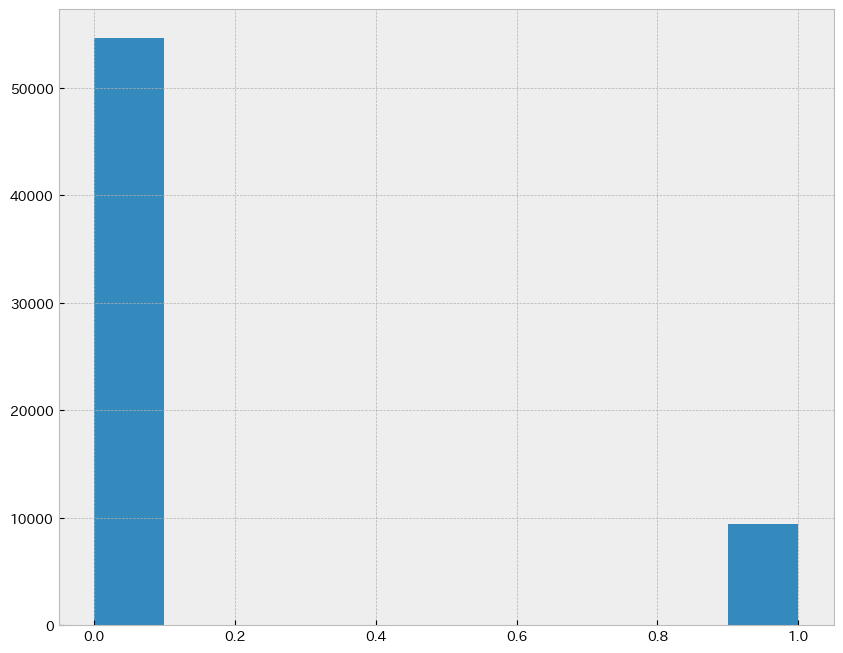

In [ ]:
df['conversion'].hist();

In [ ]:
df['conversion'].value_counts()

0    54606
1     9394
Name: conversion, dtype: int64

In [ ]:
df['conversion'].value_counts(normalize=True)

0    0.853219
1    0.146781
Name: conversion, dtype: float64

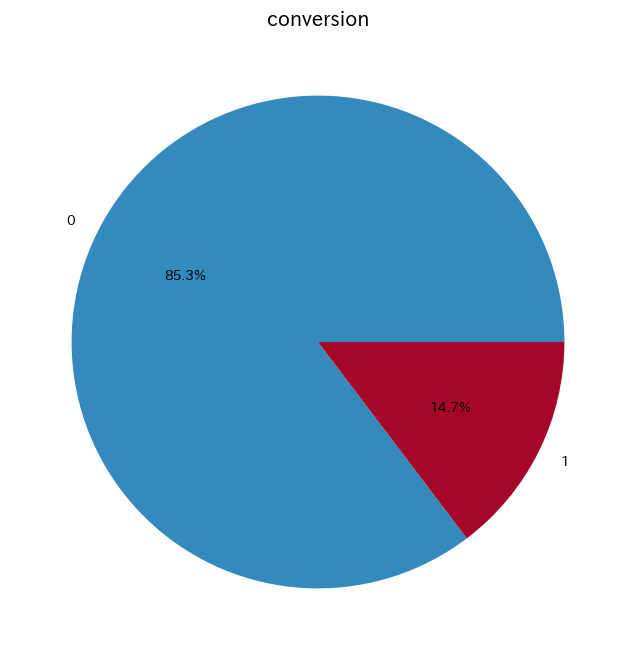

In [ ]:
x = df['conversion'].value_counts()

plt.title('conversion') # タイトルの表示
plt.pie(x, labels=x.index, autopct='%.1f%%');

In [ ]:
# 定性的なデータの確認（代表値の確認）
df.describe(include='all')

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000,64000.000000,64000,64000,64000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,3,3,NaN
top,NaN,NaN,NaN,NaN,Surburban,NaN,Web,Buy One Get One,NaN
freq,NaN,NaN,NaN,NaN,28776,NaN,28217,21387,NaN
mean,5.763734,242.085656,0.551031,0.549719,NaN,0.502250,NaN,NaN,0.146781
std,3.507592,256.158608,0.497393,0.497526,NaN,0.499999,NaN,NaN,0.353890
min,1.000000,29.990000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,64.660000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
50%,6.000000,158.110000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,9.000000,325.657500,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000


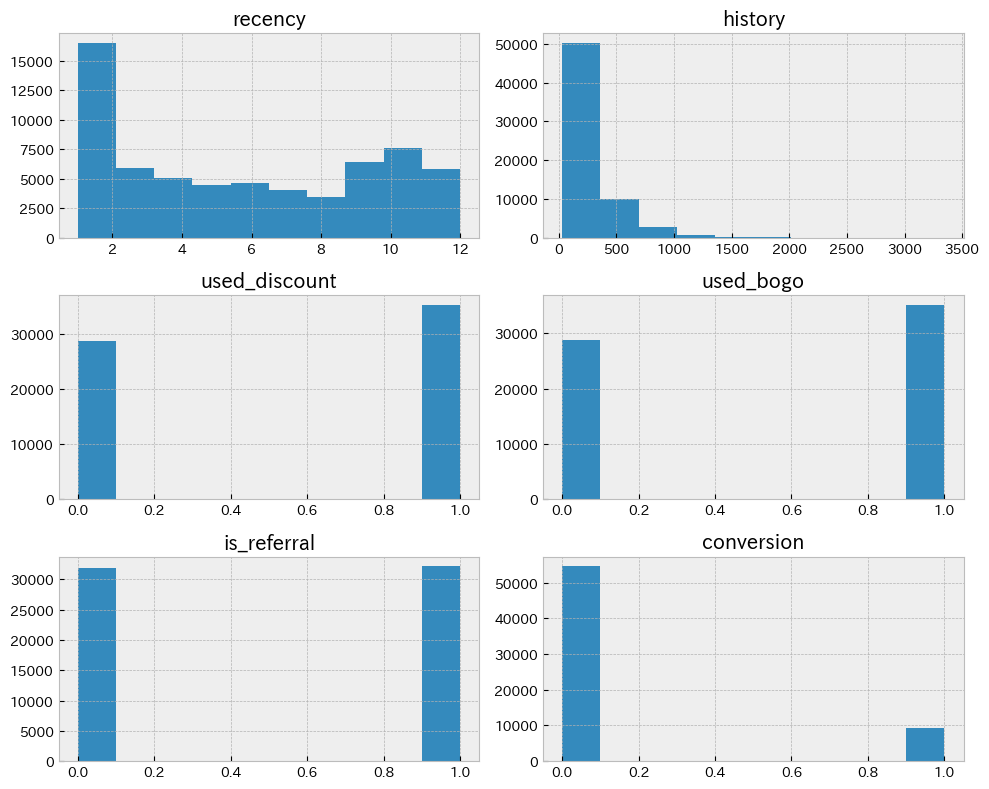

In [ ]:
df.hist();
plt.tight_layout(); # 文字が重ならないようにする設定

conversionとrecencyの関係性について分析する

In [ ]:
# クロス集計
pd.crosstab(df['conversion'], df['recency'])

recency,1,2,3,4,5,6,7,8,9,10,11,12
conversion,,,,,,,,,,,,
0,7224,6197,4922,4321,3868,3957,3532,3048,5707,6713,3081,2036
1,1728,1340,982,756,642,648,546,447,734,852,423,296


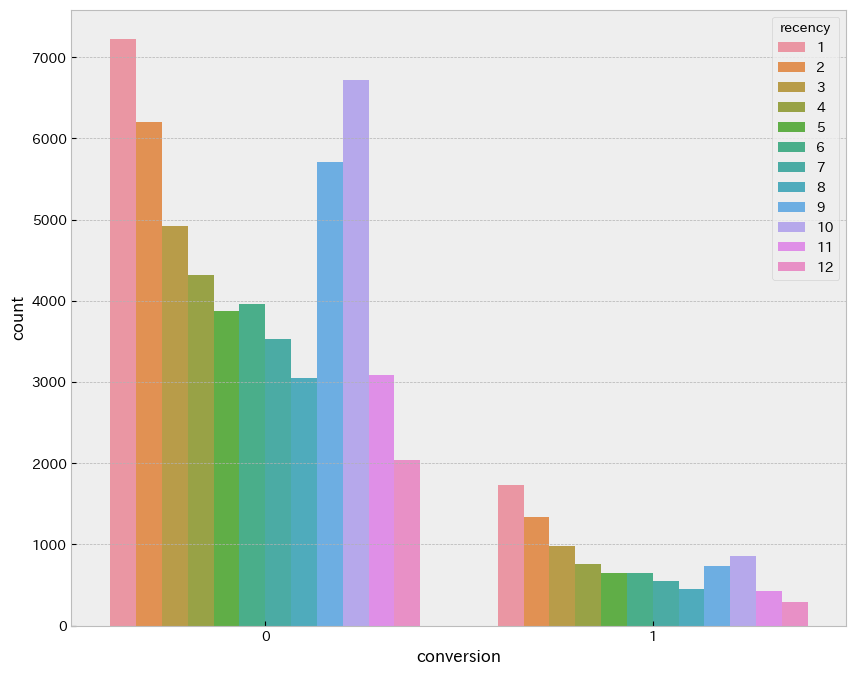

In [ ]:
sns.countplot(x='conversion', hue='recency', data=df);

In [ ]:
group = df.groupby('recency')

group.mean()

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,359.844955,0.572498,0.578195,0.554178,0.193029
2,310.990777,0.574764,0.555924,0.532440,0.177790
3,274.462007,0.557419,0.560976,0.518631,0.166328
4,251.310701,0.545007,0.559779,0.508568,0.148907
5,233.153233,0.549446,0.554545,0.490022,0.142350
6,218.387238,0.558523,0.538111,0.479045,0.140717
7,207.557580,0.553948,0.531633,0.480873,0.133889
8,194.924066,0.551645,0.529900,0.483548,0.127897
9,185.874574,0.534389,0.536563,0.478031,0.113957


In [ ]:
group.median()

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,252.960,1.0,1.0,1.0,0.0
2,211.390,1.0,1.0,1.0,0.0
3,187.485,1.0,1.0,1.0,0.0
4,172.220,1.0,1.0,1.0,0.0
5,155.865,1.0,1.0,0.0,0.0
6,145.720,1.0,1.0,0.0,0.0
7,143.435,1.0,1.0,0.0,0.0
8,132.920,1.0,1.0,0.0,0.0
9,128.140,1.0,1.0,0.0,0.0


In [ ]:
# conversion - history の関係性
pd.crosstab(df['conversion'], df['history'])


history,29.99,30.00,30.01,30.02,30.03,30.05,30.06,30.07,30.08,30.10,...,2765.98,2766.42,2809.79,2816.01,2859.63,2895.11,3003.48,3040.20,3215.97,3345.93
conversion,,,,,,,,,,,,,,,,,,,,,
0,6988,2,4,1,1,2,1,2,4,4,...,1,1,1,1,1,1,1,1,0,1
1,959,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


conversionとused_discountについて分析する

In [ ]:
# クロス集計
pd.crosstab(df['conversion'], df['used_discount'])

used_discount,0,1
conversion,,
0,24592,30014
1,4142,5252


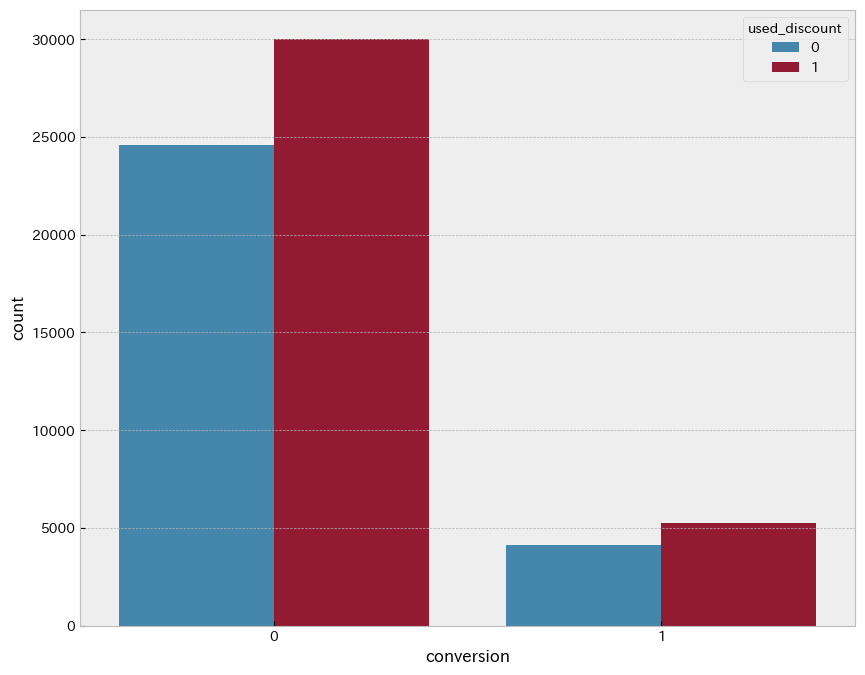

In [ ]:
sns.countplot(x='conversion', hue='used_discount', data=df);

In [ ]:
group = df.groupby('used_discount')

group.mean()

,recency,history,used_bogo,is_referral,conversion
used_discount,,,,,
0,5.885501,210.109902,1.000000,0.490673,0.144150
1,5.664521,268.138832,0.182839,0.511683,0.148925


In [ ]:
group.median()

,recency,history,used_bogo,is_referral,conversion
used_discount,,,,,
0,6.0,135.980,1.0,0.0,0.0
1,5.0,183.195,0.0,1.0,0.0


conversionとused_bogoの関係性を分析

In [ ]:
# クロス集計
pd.crosstab(df['conversion'], df['used_bogo'])

used_bogo,0,1
conversion,,
0,25174,29432
1,3644,5750


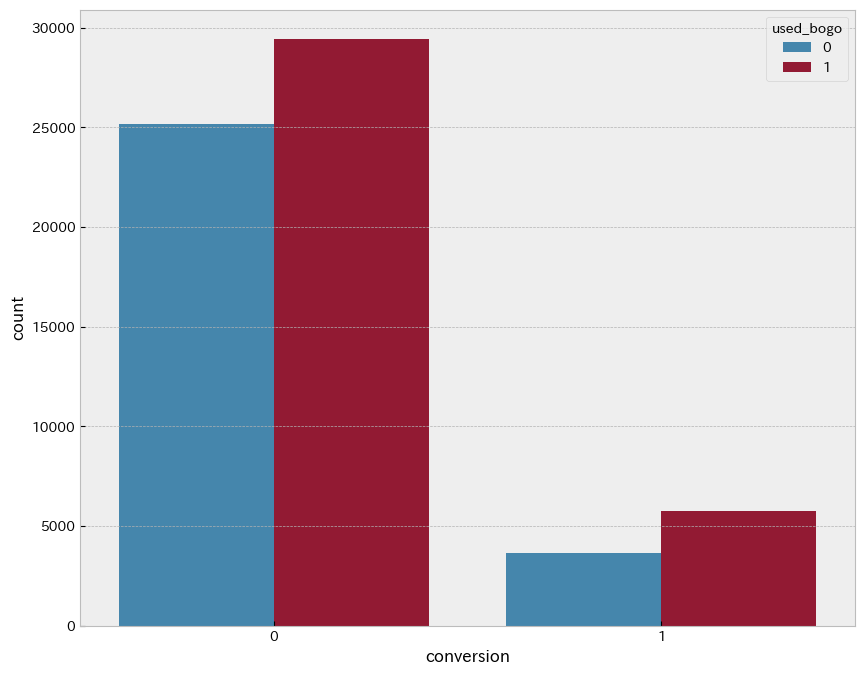

In [ ]:
sns.countplot(x='conversion', hue='used_bogo', data=df);

In [ ]:
group = df.groupby('used_bogo')

group.mean()

,recency,history,used_discount,is_referral,conversion
used_bogo,,,,,
0,5.866889,209.626353,1.000000,0.490457,0.126449
1,5.679239,268.673462,0.183276,0.511909,0.163436


In [ ]:
group.median()

,recency,history,used_discount,is_referral,conversion
used_bogo,,,,,
0,6.0,135.845,1.0,0.0,0.0
1,5.0,183.565,0.0,1.0,0.0


conversionとzip_codeの関係性について分析

In [ ]:
# クロス集計
pd.crosstab(df['conversion'], df['zip_code'])

zip_code,Rural,Surburban,Urban
conversion,,,
0,7764,24749,22093
1,1799,4027,3568


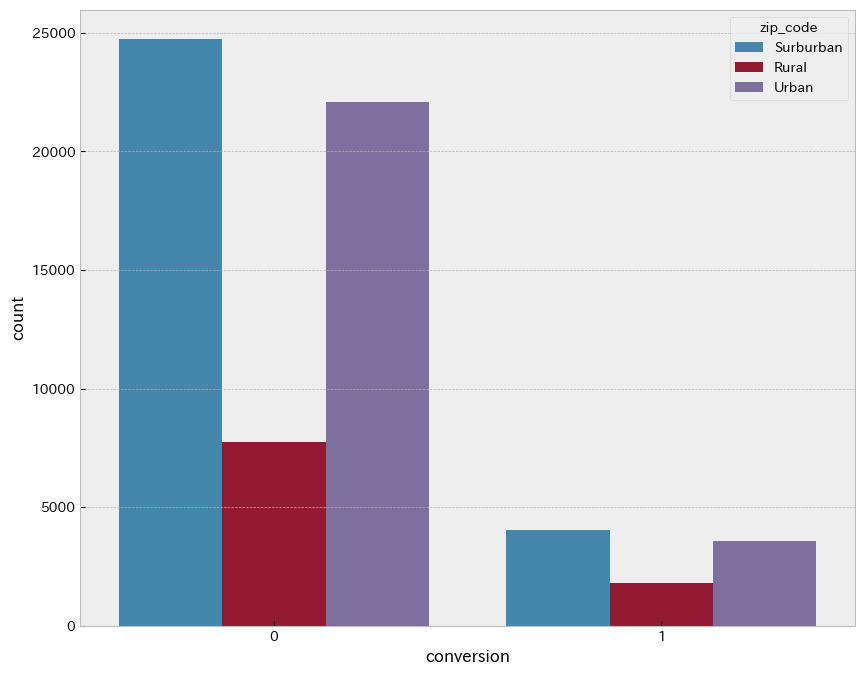

In [ ]:
sns.countplot(x='conversion', hue='zip_code', data=df);

In [ ]:
group = df.groupby('zip_code')

group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
zip_code,,,,,,
Rural,5.730210,242.853935,0.552023,0.547527,0.496601,0.188121
Surburban,5.803100,240.488905,0.549034,0.550111,0.503371,0.139943
Urban,5.732084,243.589924,0.552901,0.550095,0.503098,0.139044


In [ ]:
group.median()

,recency,history,used_discount,used_bogo,is_referral,conversion
zip_code,,,,,,
Rural,5.0,159.58,1.0,1.0,0.0,0.0
Surburban,6.0,155.52,1.0,1.0,1.0,0.0
Urban,5.0,160.28,1.0,1.0,1.0,0.0


conversionとis_referralの関係性を分析

In [ ]:
# クロス集計
pd.crosstab(df['conversion'], df['is_referral'])

is_referral,0,1
conversion,,
0,26343,28263
1,5513,3881


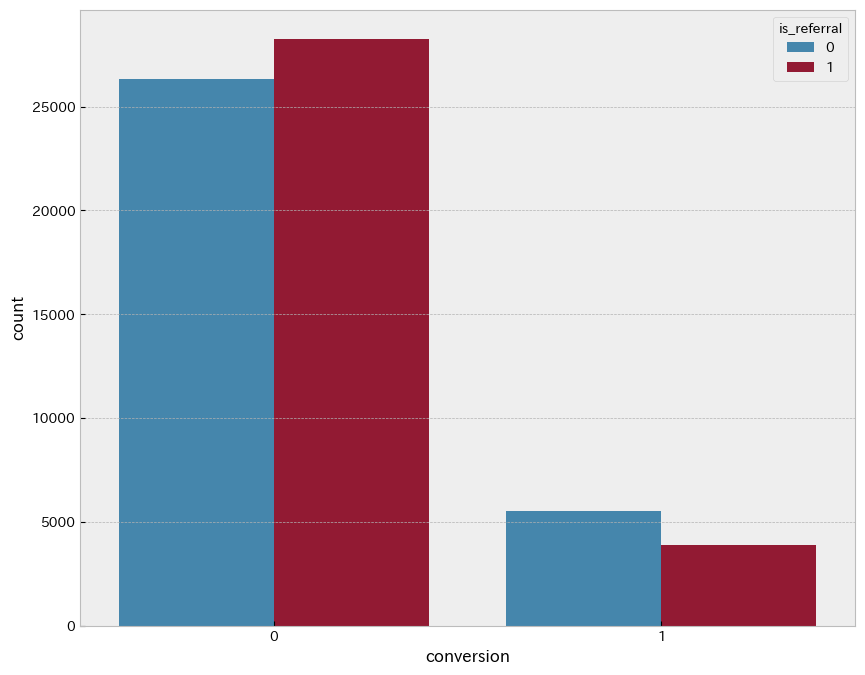

In [ ]:
sns.countplot(x='conversion', hue='is_referral', data=df);

In [ ]:
group = df.groupby('is_referral')

group.mean()

,recency,history,used_discount,used_bogo,conversion
is_referral,,,,,
0,5.947325,184.633287,0.540589,0.539051,0.173060
1,5.581788,299.023269,0.561380,0.560291,0.120738


In [ ]:
group.median()

,recency,history,used_discount,used_bogo,conversion
is_referral,,,,,
0,6.0,156.485,1.0,1.0,0.0
1,5.0,160.555,1.0,1.0,0.0


In [ ]:
# クロス集計
pd.crosstab(df['conversion'], df['channel'])

channel,Multichannel,Phone,Web
conversion,,,
0,6429,24458,23719
1,1333,3563,4498


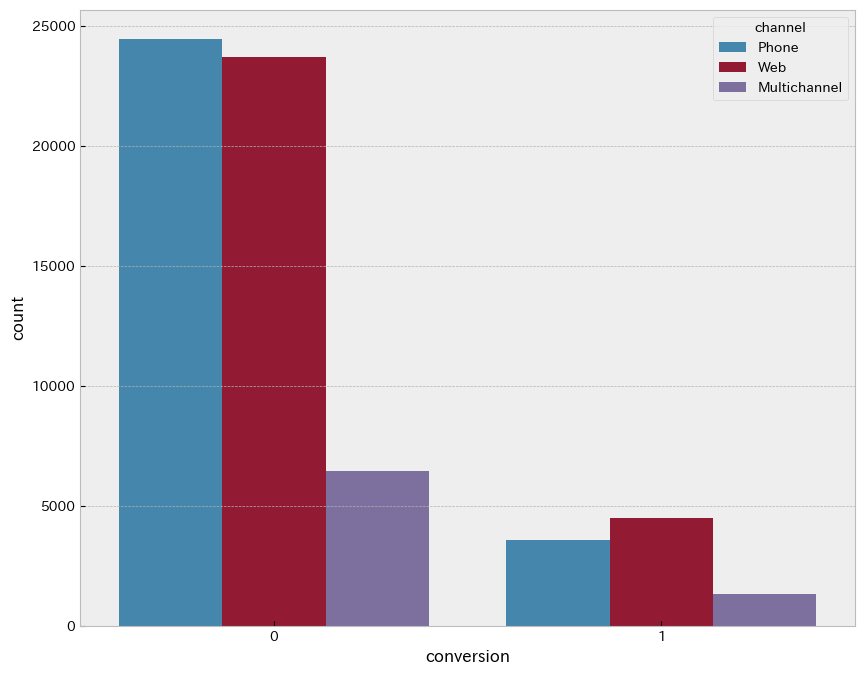

In [ ]:
sns.countplot(x='conversion', hue='channel', data=df);

In [ ]:
group = df.groupby('channel')

group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
channel,,,,,,
Multichannel,4.768488,520.970370,0.632698,0.624195,0.595723,0.171734
Phone,5.897541,202.807184,0.539203,0.538953,0.493309,0.127155
Web,5.904632,204.375017,0.540313,0.539923,0.485417,0.159407


In [ ]:
group.median()

,recency,history,used_discount,used_bogo,is_referral,conversion
channel,,,,,,
Multichannel,4.0,450.11,1.0,1.0,1.0,0.0
Phone,6.0,131.39,1.0,1.0,0.0,0.0
Web,6.0,131.68,1.0,1.0,0.0,0.0


In [ ]:
# クロス集計
pd.crosstab(df['conversion'], df['offer'])

offer,Buy One Get One,Discount,No Offer
conversion,,,
0,18149,17413,19044
1,3238,3894,2262


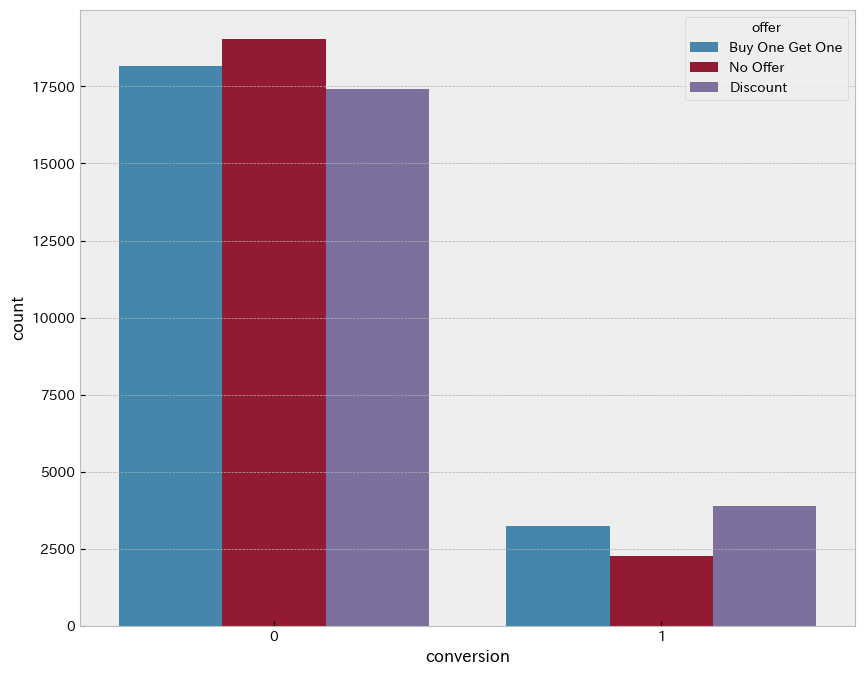

In [ ]:
sns.countplot(x='conversion', hue='offer', data=df);

In [ ]:
group = df.groupby('offer')

group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
offer,,,,,,
Buy One Get One,5.767850,242.536633,0.548932,0.550101,0.503250,0.151400
Discount,5.773642,242.835931,0.550946,0.551415,0.501525,0.182757
No Offer,5.749695,240.882653,0.553224,0.547639,0.501971,0.106167


In [ ]:
group.median()

,recency,history,used_discount,used_bogo,is_referral,conversion
offer,,,,,,
Buy One Get One,6.0,160.090,1.0,1.0,1.0,0.0
Discount,6.0,157.220,1.0,1.0,1.0,0.0
No Offer,5.0,156.655,1.0,1.0,1.0,0.0


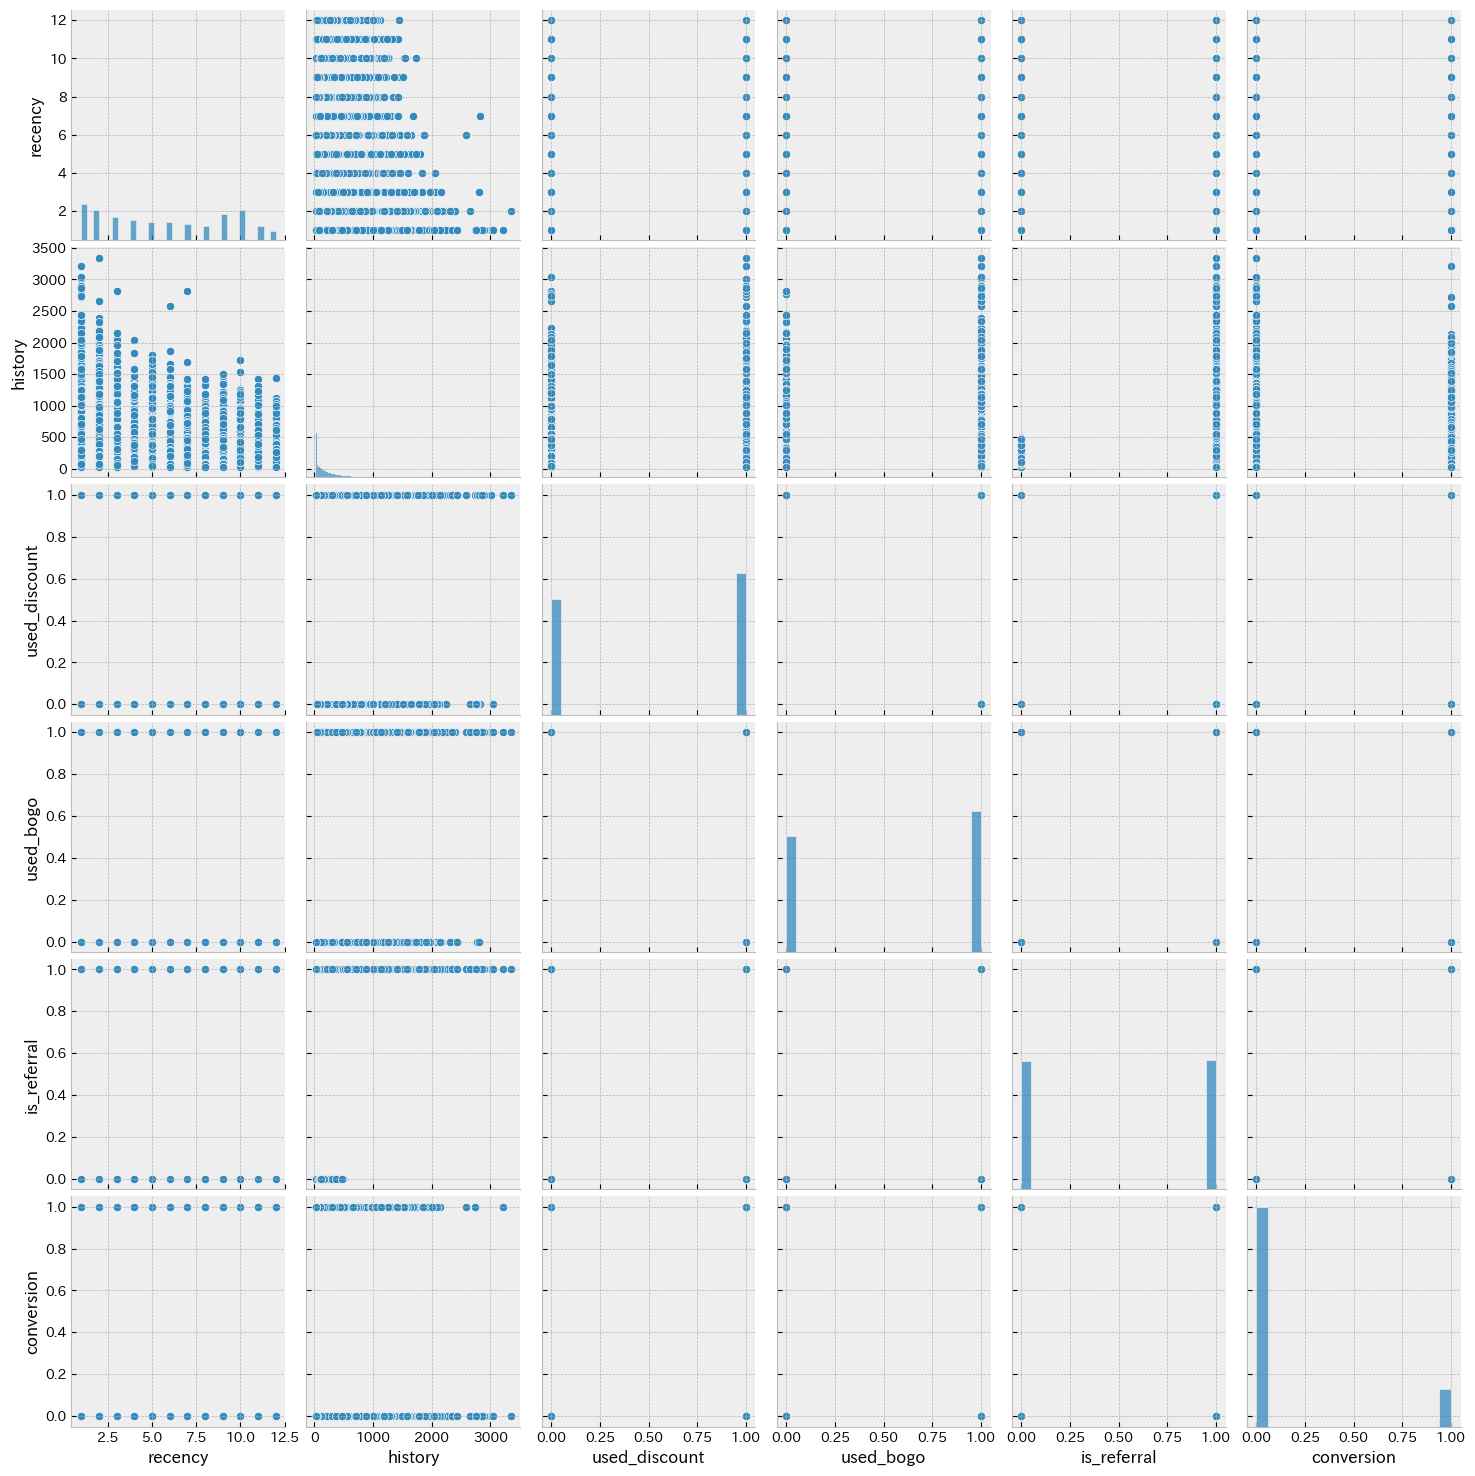

In [ ]:
sns.pairplot(df);

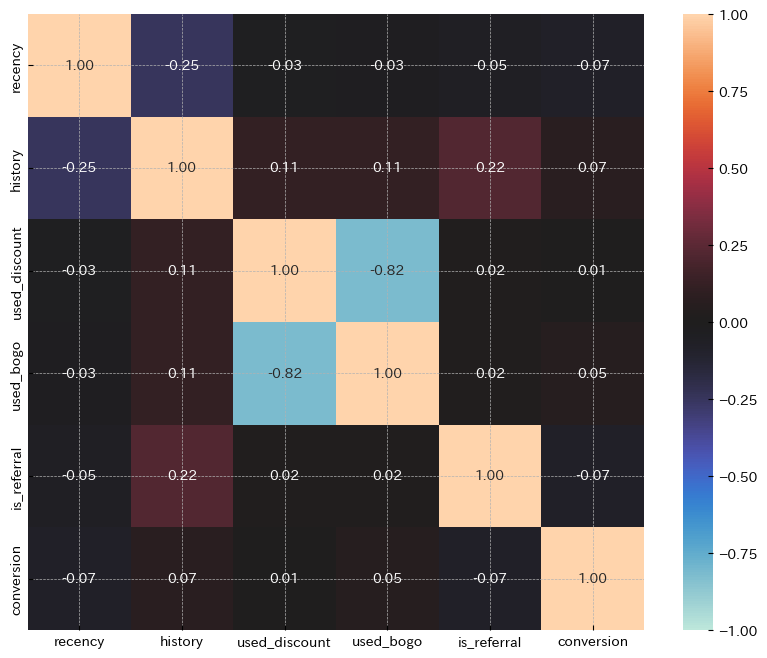

In [ ]:
# 相関分析
sns.heatmap(df.corr(),
            annot=True, square=True,
            vmax=1,
            vmin=-1,
            center=0,
            fmt='.2f');

In [ ]:
# `conversion`との相関が高い変数を確認する
tmp = df.corr()['conversion']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

conversion    1.0
Name: conversion, dtype: float64

In [ ]:
# 変数の選択: 目的変数→conversion、入力変数→conversion以外の数値データ

# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df.head()

x = _df.drop(['conversion'], axis=1)
y = _df['conversion']
x.head()

,recency,history,used_discount,used_bogo,is_referral,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,1,0,1,0,0,0
1,6,329.08,1,1,1,0,0,0,1,0,1
2,7,180.65,0,1,1,1,0,0,1,0,0
3,9,675.83,1,0,1,0,0,0,1,1,0
4,2,45.34,1,0,0,0,1,0,1,0,0


In [ ]:
# 変数の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled,
                       columns=_df.drop(['conversion'],
                                        axis=1).columns)
feature.head()

,recency,history,used_discount,used_bogo,is_referral,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,1.106380,-0.818119,1.133138,-0.888008,-0.706452,-0.706427
1,0.067359,0.339614,0.902651,0.905048,0.99551,-0.903849,-0.818119,-0.882505,1.126116,-0.706452,1.415574
2,0.352457,-0.239836,-1.107848,0.905048,0.99551,1.106380,-0.818119,-0.882505,1.126116,-0.706452,-0.706427
3,0.922653,1.693278,0.902651,-1.104914,0.99551,-0.903849,-0.818119,-0.882505,1.126116,1.415524,-0.706427
4,-1.073034,-0.768068,0.902651,-1.104914,-1.00451,-0.903849,1.222316,-0.882505,1.126116,-0.706452,-0.706427


In [ ]:
# 重回帰分析を実行

np.random.seed(0) # 乱数の固定
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()


In [ ]:
# 分析結果の表示
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:14:41   Log-Likelihood:                -23208.
No. Observations:               64000   AIC:                         4.644e+04
Df Residuals:                   63988   BIC:                         4.655e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1468      0.001    106.775      0.000       0.144       0.149
recency               -0.0220      0.001    -15.540      0.000      -0.025      -0.019
history                0.0145      0.002      8.706      0.000       0.011       0.018
used_discount          0.0442      0.003     17.268      0.000       0.039       0.049
used_bogo              0.0530      0.003     20.703      0.000       0.048       0.058
is_referral           -0.0323      0.001    -22.860      0.000      -0.035      -0.029
zip_code_Surburban    -0.0232      0.002    -11.367      0.000      -0.027      -0.019
zip_code_Urban        -0.0238      0.002    -11.637      0.000      -0.028      -0.020
channel_Phone         -0.0045      0.002     -1.852      0.064      -0.009       0.000
channel_Web            0.0111      0.002      4.604      0.000       0.006       0.016
offer_Discount         0.0144      0.002      9.070      0.000       0.011       0.017
offer_No Offer        -0.0214      0.002    -13.511      0.000      -0.025      -0.018
==============================================================================
Omnibus:                    20397.703   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47287.860
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                       4.849   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

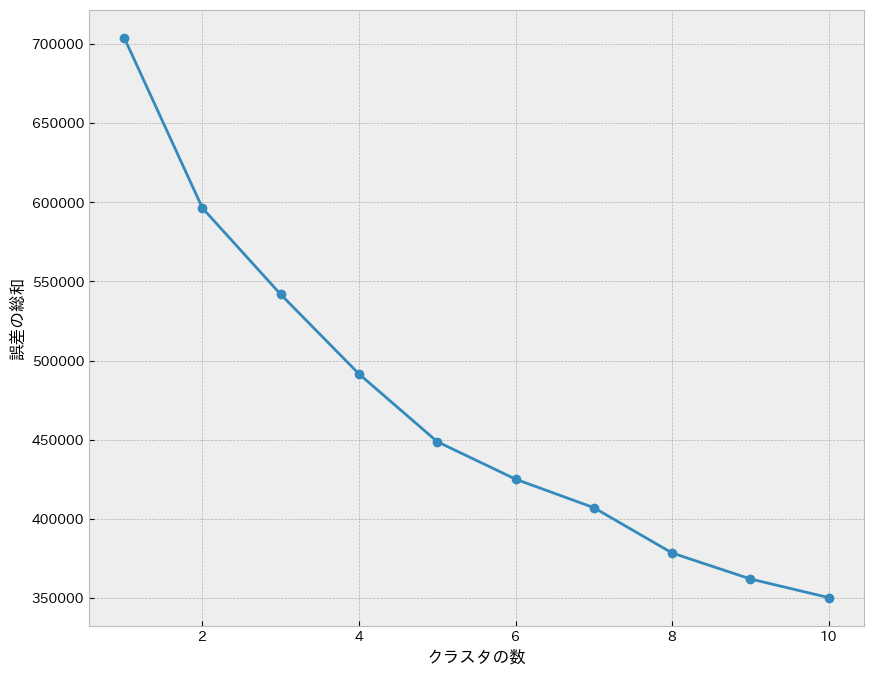

In [ ]:
# クラスタリング : エルボー法による最適なクラスタ数の計算

from sklearn.cluster import KMeans

sse = []

for i  in range(1,11):
    kmeans = KMeans(
        n_clusters=i,
        n_init=10,
        random_state=0
        )

    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
# クラスタリングの実行 : エルボー法で最適なクラスタ数を指定して実装してください。
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[1 2 4 ... 1 3 4]


In [ ]:
# 実行してください
df_clustering = _df.copy() # df のデータをコピー

In [ ]:
# 変数名 `cluster` で df_clustering にクラスタリングの結果を追加

# cluster、のカラム追加
df_clustering['cluster'] = cluster
df_clustering.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer,cluster
0,10,142.44,1,0,0,0,1,0,1,0,0,0,1
1,6,329.08,1,1,1,0,0,0,0,1,0,1,2
2,7,180.65,0,1,1,0,1,0,0,1,0,0,4
3,9,675.83,1,0,1,0,0,0,0,1,1,0,2
4,2,45.34,1,0,0,0,0,1,0,1,0,0,2


In [ ]:
# 変数 `cluster` 毎に groupby() でまとめる

# クラスターごとにグループ分け
groups = df_clustering.groupby('cluster')
groups.size()

cluster
0    14672
1    12530
2    15929
3     7471
4    13398
dtype: int64

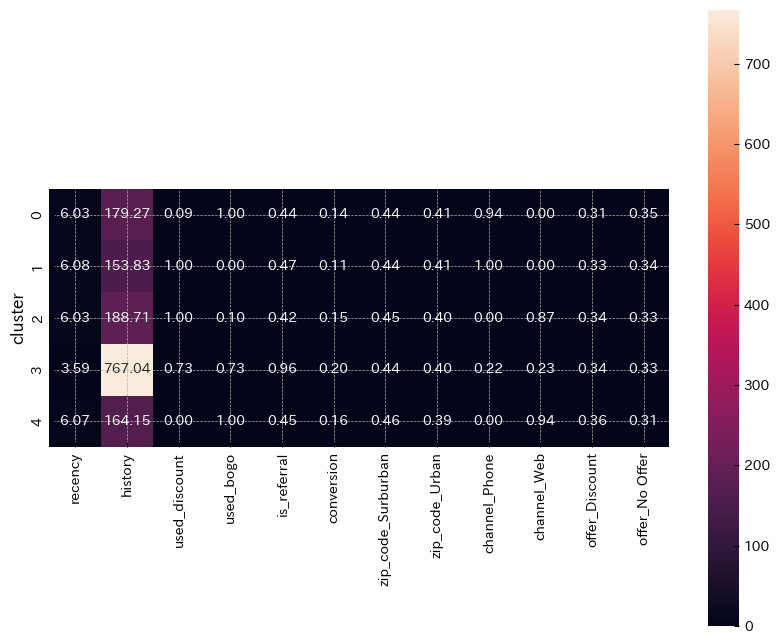

In [ ]:
# クラスタ毎の各項目の代表値を見る(平均値）:
mean = groups.mean()

sns.heatmap(
    mean,
    annot=True,
    square=True,
    #vmin=0.0,
    #vmax=5.0,
    #center=3.0,
    fmt='.2f'
    );

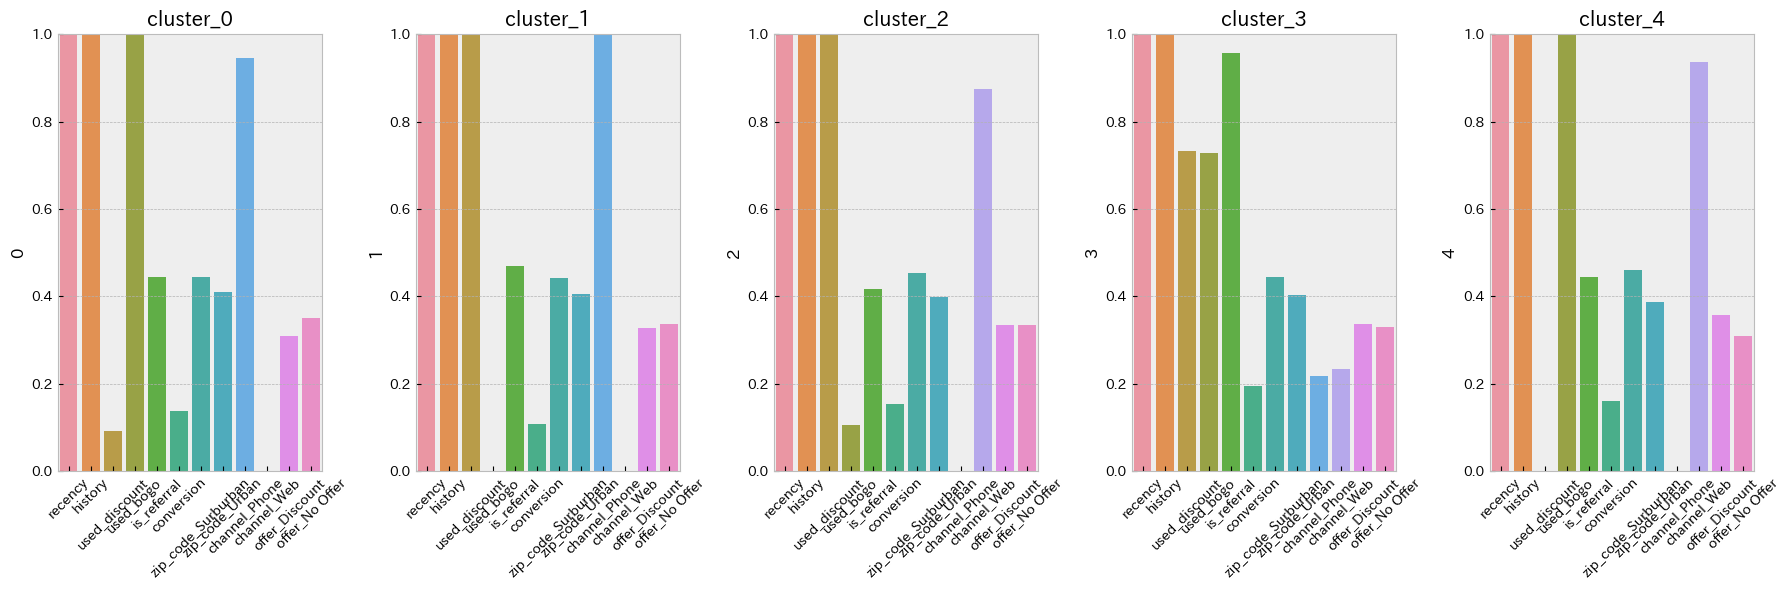

In [ ]:
# 実行してください
num = kmeans.n_clusters

plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 5, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=mean.columns, y=mean.loc[n])
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.yscale("log")
    plt.ylim(0, 1)

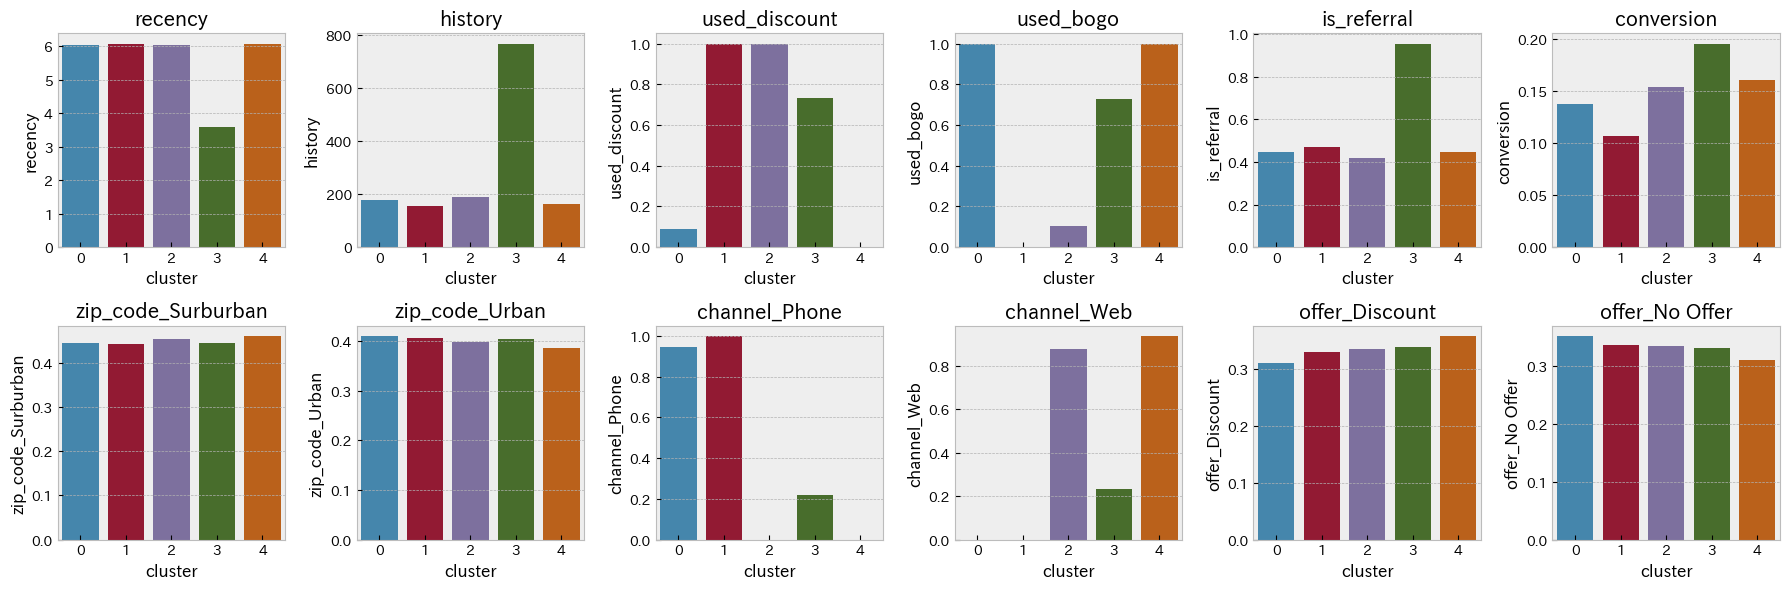

In [ ]:
# 各変数ごとに可視化して確認
plt.figure(figsize=(18, 6))

for n, col in enumerate(mean.columns):
    plt.subplot(2, 6, n+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

In [ ]:
# 変数の選択: 目的変数→conversion、入力変数→conversion以外の数値データ

# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,1,0,1,0,0,0
1,6,329.08,1,1,1,0,0,0,0,1,0,1
2,7,180.65,0,1,1,0,1,0,0,1,0,0
3,9,675.83,1,0,1,0,0,0,0,1,1,0
4,2,45.34,1,0,0,0,0,1,0,1,0,0


In [ ]:
# 変数の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

_df_scaled = scaler.fit_transform(_df)
_df_scaled = pd.DataFrame(_df_scaled,
                       columns=_df.columns)
_df_scaled.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,-0.414768,1.106380,-0.818119,1.133138,-0.888008,-0.706452,-0.706427
1,0.067359,0.339614,0.902651,0.905048,0.99551,-0.414768,-0.903849,-0.818119,-0.882505,1.126116,-0.706452,1.415574
2,0.352457,-0.239836,-1.107848,0.905048,0.99551,-0.414768,1.106380,-0.818119,-0.882505,1.126116,-0.706452,-0.706427
3,0.922653,1.693278,0.902651,-1.104914,0.99551,-0.414768,-0.903849,-0.818119,-0.882505,1.126116,1.415524,-0.706427
4,-1.073034,-0.768068,0.902651,-1.104914,-1.00451,-0.414768,-0.903849,1.222316,-0.882505,1.126116,-0.706452,-0.706427


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0)

In [ ]:
# 主成分分析を実行（fit()）し、主成分の生成（transform()）
feature = pca.fit_transform(_df_scaled)

In [ ]:
# サイズの確認
feature.shape

(64000, 12)

In [ ]:
pd.DataFrame(
    feature,
    columns=[f'PC{x+1}' for x in range(len(_df_scaled.columns))]
).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.502298,-0.945543,-1.737379,-0.019745,-1.357105,0.044574,0.105346,0.844205,0.999710,-0.187515,0.122517,0.061830
1,0.079877,1.253606,0.310835,-1.575640,0.915192,-0.681183,0.425383,-0.070748,-0.504785,1.217443,0.130649,-1.246684
2,1.611712,1.431712,-1.012501,-0.232190,0.036542,-1.116565,0.298350,-0.462640,1.003147,-0.183564,0.094273,0.056941
3,-1.227879,1.559269,0.389832,1.405791,0.833879,-1.500179,0.712223,1.093059,-0.490705,1.244908,0.557197,0.370023
4,-1.359042,1.209758,1.713378,-0.199485,-0.555418,0.597500,-1.430362,-0.473367,1.023722,-0.210194,0.007429,-0.019034


In [ ]:
pca.explained_variance_ratio_

array([0.15157736, 0.1492626 , 0.14479671, 0.12681964, 0.11743837,
       0.08864879, 0.07161096, 0.05945353, 0.04173466, 0.0216431 ,
       0.01442241, 0.01259187])

In [ ]:
# 寄与率
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.151577
PC2,0.149263
PC3,0.144797
PC4,0.126820
PC5,0.117438
PC6,0.088649
PC7,0.071611
PC8,0.059454
PC9,0.041735
PC10,0.021643


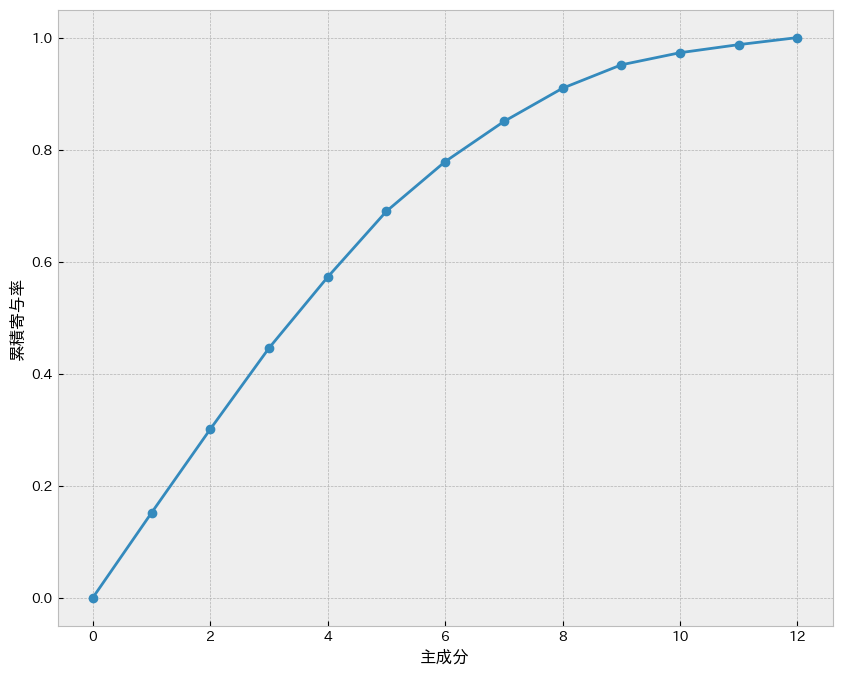

In [ ]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(variance_ratio,)), '-o')
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.show()

In [ ]:
# 固有ベクトル
eigenvector = pca.components_

pd.DataFrame(eigenvector,
             index=[f'PC{x+1}' for x in range(len(eigenvector))],
             columns=_df_scaled.columns)

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
PC1,-0.000942,0.005393,-0.699371,0.701918,-0.003954,0.051408,0.039318,-0.039800,-0.075157,0.075422,0.021899,-0.023614
PC2,-0.002747,0.004723,0.087545,-0.083628,-0.017357,0.073334,0.147426,-0.149883,-0.683663,0.682675,0.034051,-0.028876
PC3,-0.028952,0.027711,-0.015840,0.025702,0.004673,0.028417,-0.689768,0.688827,-0.154218,0.145116,0.029307,-0.026259
PC4,-0.067084,0.082500,0.040127,-0.012013,0.014907,0.210346,0.018372,-0.028140,0.039673,-0.063132,0.682789,-0.685261
PC5,-0.518440,0.684979,0.092518,0.085417,0.441803,0.105187,0.023208,-0.026081,-0.098246,-0.108866,-0.093716,0.091696
PC6,-0.325636,-0.015479,0.037743,-0.001332,-0.590418,0.713327,-0.012708,-0.021200,0.040942,-0.047371,-0.128239,0.117853
PC7,0.630429,0.067465,0.041362,0.009212,0.441701,0.622431,-0.021366,-0.009109,0.018308,-0.029652,-0.086526,0.066713
PC8,0.471382,0.657627,0.090642,0.095815,-0.509719,-0.192452,0.006828,0.006484,-0.125287,-0.121743,0.018720,-0.010976
PC9,-0.003012,0.002961,-0.002509,-0.003891,-0.005443,-0.015026,0.001407,0.003436,-0.002702,0.004287,-0.705854,-0.708121
PC10,0.000417,0.008001,-0.009699,-0.007890,-0.001567,-0.033873,-0.706595,-0.706574,0.006335,0.007633,-0.001889,-0.002087


In [ ]:
# 主成分負荷量
factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(factor_loading,
            index=[f'PC{x+1}' for x in range(len(factor_loading))],
             columns=_df_scaled.columns)

df_factor_loading.head(3)

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
PC1,-0.001270,0.007273,-0.943232,0.946667,-0.005333,0.069333,0.053027,-0.053677,-0.101363,0.101720,0.029535,-0.031847
PC2,-0.003677,0.006322,0.117165,-0.111924,-0.023229,0.098146,0.197308,-0.200596,-0.914980,0.913658,0.045572,-0.038646
PC3,-0.038164,0.036528,-0.020880,0.033880,0.006160,0.037459,-0.909236,0.907995,-0.203286,0.191288,0.038631,-0.034614


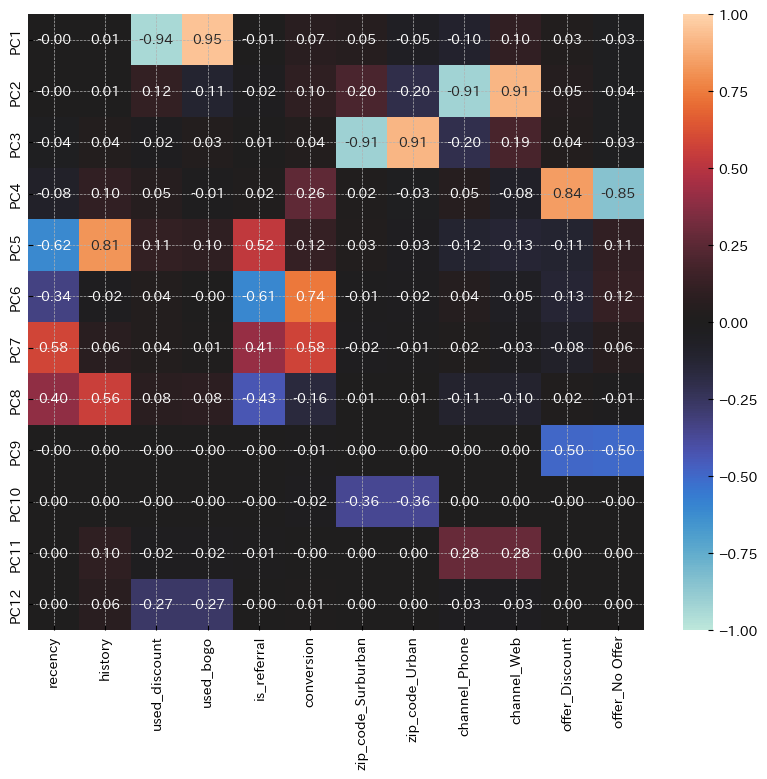

In [ ]:
sns.heatmap(df_factor_loading, vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

In [ ]:
feature_df = pd.DataFrame(feature)
new_data = pd.concat([_df_scaled, feature_df], axis=1)
new_data.head(2)

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,...,2,3,4,5,6,7,8,9,10,11
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,-0.414768,1.106380,-0.818119,1.133138,-0.888008,...,-1.737379,-0.019745,-1.357105,0.044574,0.105346,0.844205,0.999710,-0.187515,0.122517,0.061830
1,0.067359,0.339614,0.902651,0.905048,0.99551,-0.414768,-0.903849,-0.818119,-0.882505,1.126116,...,0.310835,-1.575640,0.915192,-0.681183,0.425383,-0.070748,-0.504785,1.217443,0.130649,-1.246684


In [ ]:
# 実行してください
new_data_clustering = new_data.copy() # new_data のデータをコピー

In [ ]:
# cluster、のカラム追加
new_data_clustering['cluster'] = cluster
new_data_clustering.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,...,3,4,5,6,7,8,9,10,11,cluster
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,-0.414768,1.106380,-0.818119,1.133138,-0.888008,...,-0.019745,-1.357105,0.044574,0.105346,0.844205,0.999710,-0.187515,0.122517,0.061830,1
1,0.067359,0.339614,0.902651,0.905048,0.99551,-0.414768,-0.903849,-0.818119,-0.882505,1.126116,...,-1.575640,0.915192,-0.681183,0.425383,-0.070748,-0.504785,1.217443,0.130649,-1.246684,2
2,0.352457,-0.239836,-1.107848,0.905048,0.99551,-0.414768,1.106380,-0.818119,-0.882505,1.126116,...,-0.232190,0.036542,-1.116565,0.298350,-0.462640,1.003147,-0.183564,0.094273,0.056941,4
3,0.922653,1.693278,0.902651,-1.104914,0.99551,-0.414768,-0.903849,-0.818119,-0.882505,1.126116,...,1.405791,0.833879,-1.500179,0.712223,1.093059,-0.490705,1.244908,0.557197,0.370023,2
4,-1.073034,-0.768068,0.902651,-1.104914,-1.00451,-0.414768,-0.903849,1.222316,-0.882505,1.126116,...,-0.199485,-0.555418,0.597500,-1.430362,-0.473367,1.023722,-0.210194,0.007429,-0.019034,2


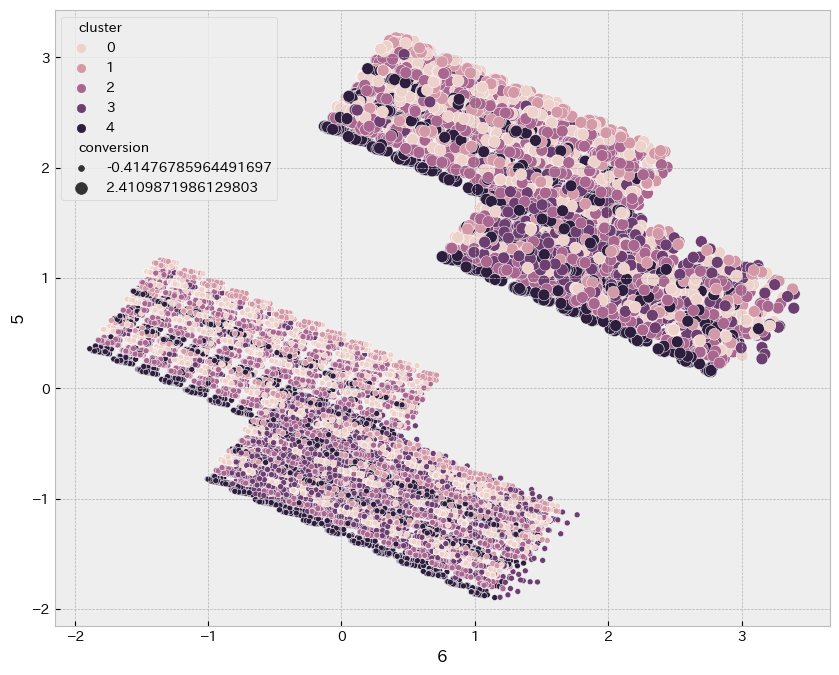

In [ ]:
sns.scatterplot(x=6, y=5, hue='cluster', size='conversion', data=new_data_clustering);

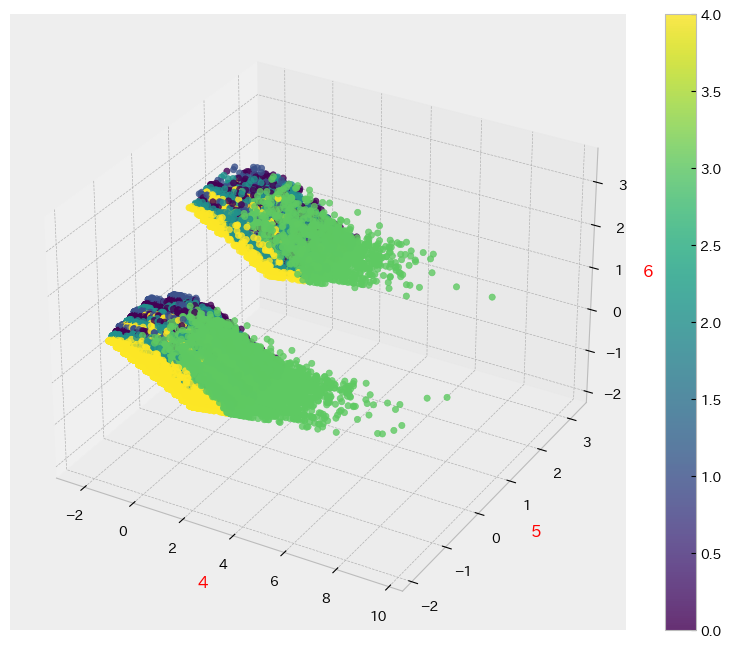

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    new_data[4],
    new_data[5],
    new_data[6],
    alpha=0.8,
    c=list(new_data_clustering['cluster'])
)

cbar = fig.colorbar(scatter)

ax.set_xlabel('4', c='r')
ax.set_ylabel('5', c='r')
ax.set_zlabel('6', c='r')

plt.show();